In [1]:
#import libraries
import pandas as pd
# import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
#import data and view
data_origin = pd.read_csv("../db/drebin215dataset5560malware9476benign.csv", skipinitialspace=True)
data_origin.head()

/Users/allen/Desktop/SFSU/Independent-Study/Android-Security-Analysis/env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (92) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [3]:
data_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15036 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.8+ MB


# Data Preprocessing

In [4]:
#check null value
data_origin.isnull().sum(axis = 0)

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [5]:
#data preprocessing
df = data_origin.copy()
df.head()

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,S
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,S
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,S
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,S


In [6]:
#display the columns with the '?'
for i in df.columns:
    if '?' in df[i].unique().astype(str):
        print(i)
        print(df[i].value_counts())
        print('\n')

TelephonyManager.getSimCountryIso
0    6994
0    5514
1    1330
1    1193
?       5
Name: TelephonyManager.getSimCountryIso, dtype: int64




In [7]:
#replace '?' with Null as missing data
df[df.astype(str) == '?'] = np.nan
df.isnull().sum()

transact                      0
onServiceConnected            0
bindService                   0
attachInterface               0
ServiceConnection             0
                             ..
ACCESS_FINE_LOCATION          0
SET_WALLPAPER_HINTS           0
SET_PREFERRED_APPLICATIONS    0
WRITE_SECURE_SETTINGS         0
class                         0
Length: 216, dtype: int64

In [8]:
# Drop nan
df = df[df['TelephonyManager.getSimCountryIso'].notna()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15031 entries, 0 to 15035
Columns: 216 entries, transact to class
dtypes: int64(214), object(2)
memory usage: 24.9+ MB


In [9]:
from collections import Counter
Counter(df['class'])

Counter({'S': 5555, 'B': 9476})

In [10]:
# Digitalize class
df['class'] = df['class'].apply(lambda x: int(x == "S"))
df

,transact,onServiceConnected,bindService,attachInterface,ServiceConnection,android.os.Binder,SEND_SMS,Ljava.lang.Class.getCanonicalName,Ljava.lang.Class.getMethods,Ljava.lang.Class.cast,...,READ_CONTACTS,DEVICE_POWER,HARDWARE_TEST,ACCESS_WIFI_STATE,WRITE_EXTERNAL_STORAGE,ACCESS_FINE_LOCATION,SET_WALLPAPER_HINTS,SET_PREFERRED_APPLICATIONS,WRITE_SECURE_SETTINGS,class
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15031,1,1,1,1,1,1,0,1,1,1,...,0,0,0,1,1,0,0,0,0,0
15032,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
15033,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
15034,1,1,1,1,1,1,0,1,1,1,...,1,0,0,1,1,1,0,0,0,0


In [11]:
Counter(df['class'])

Counter({1: 5555, 0: 9476})

# Data Visualization

# Model

In [12]:
# import model training class from data_scikit_cv
from data_scikit_cv import ModelsTraining 
df_models = ModelsTraining(df, 'class')

10-fold Cross Validation


======================================== 1/6 Naive Bayesian ========================================
Training model...

accuracy_scores:
 [0.71404821 0.69908562 0.69908562 0.68744805 0.68718802 0.7046589
 0.72462562 0.70216306 0.68469218 0.70216306]
f1_scores:
 [0.71941272 0.70664506 0.7104     0.69823435 0.69968051 0.71255061
 0.72846596 0.70941558 0.69704237 0.70894309]
The mean accuracy: 0.701
The mean f1 score: 0.709


              precision    recall  f1-score   support

           0       0.55      0.98      0.71      1085
           1       0.98      0.55      0.71      1922

    accuracy                           0.71      3007
   macro avg       0.77      0.77      0.71      3007
weighted avg       0.83      0.71      0.71      3007



=================================== 2/6 Decision Tree Classifier ===================================
Training model...

accuracy_scores:
 [0.97007481 0.97339983 0.98004988 0.97506234 0.97420965 0.97088186
 0.97254576 

In [13]:
# Split data
X = df_models.X
y = df_models.y
X_test = df_models.X_test
y_test = df_models.y_test
y_pred_ls = df_models.y_pred_ls
model_ls = df_models.model_ls

# Result Visualization

## Consfusion Matrix for the Classifier 

<Figure size 360x360 with 0 Axes>

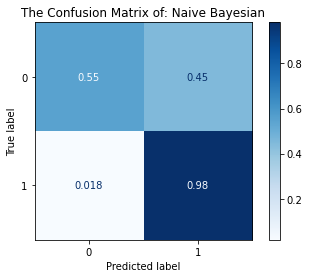

<Figure size 360x360 with 0 Axes>

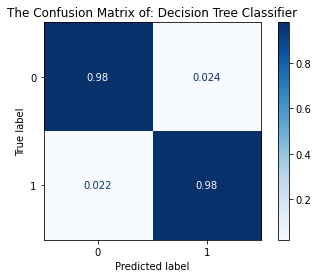

<Figure size 360x360 with 0 Axes>

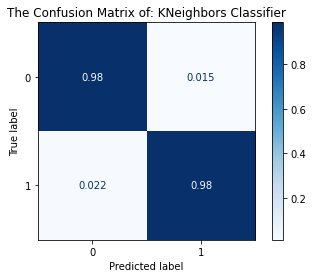

<Figure size 360x360 with 0 Axes>

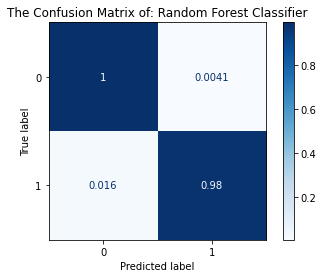

<Figure size 360x360 with 0 Axes>

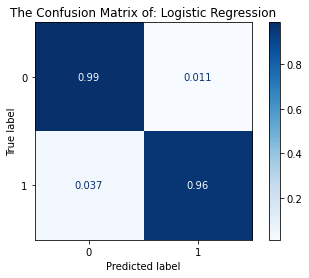

<Figure size 360x360 with 0 Axes>

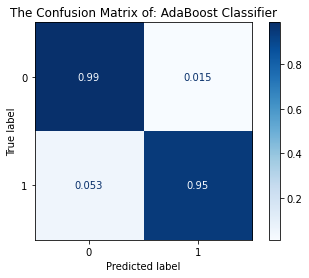

In [14]:
from sklearn.metrics import plot_confusion_matrix
for name, clf in model_ls.items():
#     print ("The Confusion Matrix of: ", name)
#     print (pd.DataFrame(confusion_matrix(y_test, y_pred)))
    plt.figure(figsize=(5,5))
    disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
    disp.ax_.set_title("The Confusion Matrix of: %s" % name)
    plt.show()

In [15]:
# df_models.confusion_matrix_visualization()
accuracy_f1 = df_models.accuracy_f1()
accuracy_f1.style.background_gradient(cmap='Blues')

,ML Models,Accuracy,F1-score
0,Naive Bayesian,0.700516,0.709079
1,Decision Tree Classifier,0.974218,0.965622
2,KNeighbors Classifier,0.980789,0.974102
3,Random Forest Classifier,0.991686,0.988345
4,Logistic Regression,0.977629,0.969829
5,AdaBoost Classifier,0.971225,0.961181


## ROC Curve

In [16]:
# df_models.accuracy_f1()

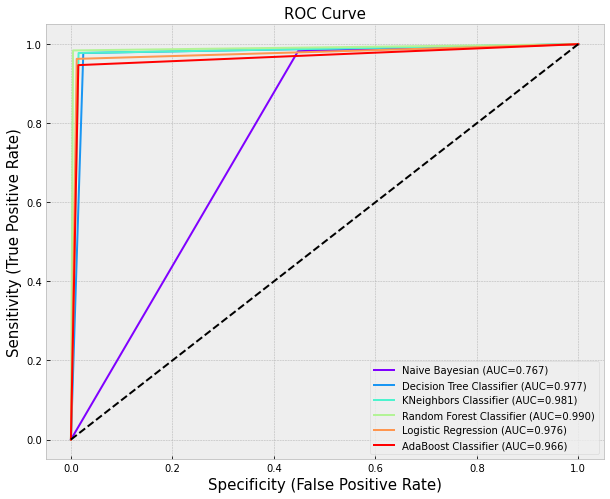

In [17]:
# ROC Curve for the classification models

from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from numpy import interp

# Setting the parameters for the ROC Curve
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")
color = cm.rainbow(np.linspace(0, 1, len(model_ls)))
plt.title("ROC Curve", fontsize = 15)
plt.xlabel("Specificity (False Positive Rate)", fontsize = 15)
plt.ylabel("Sensitivity (True Positive Rate)", fontsize = 15)
labels = list()


# Plot ROC Curve
for c, (name, y_pred) in enumerate(y_pred_ls.items()):
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color[c])
    labels.append('{} (AUC={:.3f})'.format(name, roc_auc))
  
plt.gca().legend(labels, loc='lower right', frameon=True)    
plt.plot([0,1],[0,1], linestyle='--', color='black')
plt.show()

## Learning Curve

In [18]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_validate
# from sklearn.model_selection import learning_curve
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import ShuffleSplit

# def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
#                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
#     plt.figure()
#     plt.title(title)
#     if ylim is not None:
#         plt.ylim(*ylim)
#     plt.xlabel("Training examples")
#     plt.ylabel("Score")
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
#     train_scores_mean = np.mean(train_scores, axis=1)
#     train_scores_std = np.std(train_scores, axis=1)
#     test_scores_mean = np.mean(test_scores, axis=1)
#     test_scores_std = np.std(test_scores, axis=1)
#     plt.grid()

#     plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                      train_scores_mean + train_scores_std, alpha=0.1,
#                      color="r")
#     plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
#                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
#     plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
#              label="Training score")
#     plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
#              label="Cross-validation score")

#     plt.legend(loc="best")
#     return plt


# for name, model in model_ls.items():
#     title = "Learning Curves for " + name
#     cv=None
# #     cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
#     plot_learning_curve(model, title, X, y, ylim=(0.2, 1.01), n_jobs=4)
#     plt.show()